<a href="https://colab.research.google.com/github/ved1beta/fast.ai/blob/main/fast1lec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [13]:
from fastbook import *

In [26]:
urls = search_images_ddg('dog photos' ,max_images =18)
len(urls),urls[7]

(18, 'https://images6.alphacoders.com/678/678636.jpg')

In [ ]:
from fastdoenload import doenload_url
dest='dog.jpg'
download_url(urls[0],dest, show_progress=False)

In [ ]:
im =Image.open(dest)
im.to_thumb(256,256)

In [24]:
searches='bird','forest'
path=Path('bird_or_not')
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest,urls=search_images_ddg(f'{o}photo'))
    resize_images(path/o,max_size=400,dest=path/o)

In [20]:
failed=verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

29

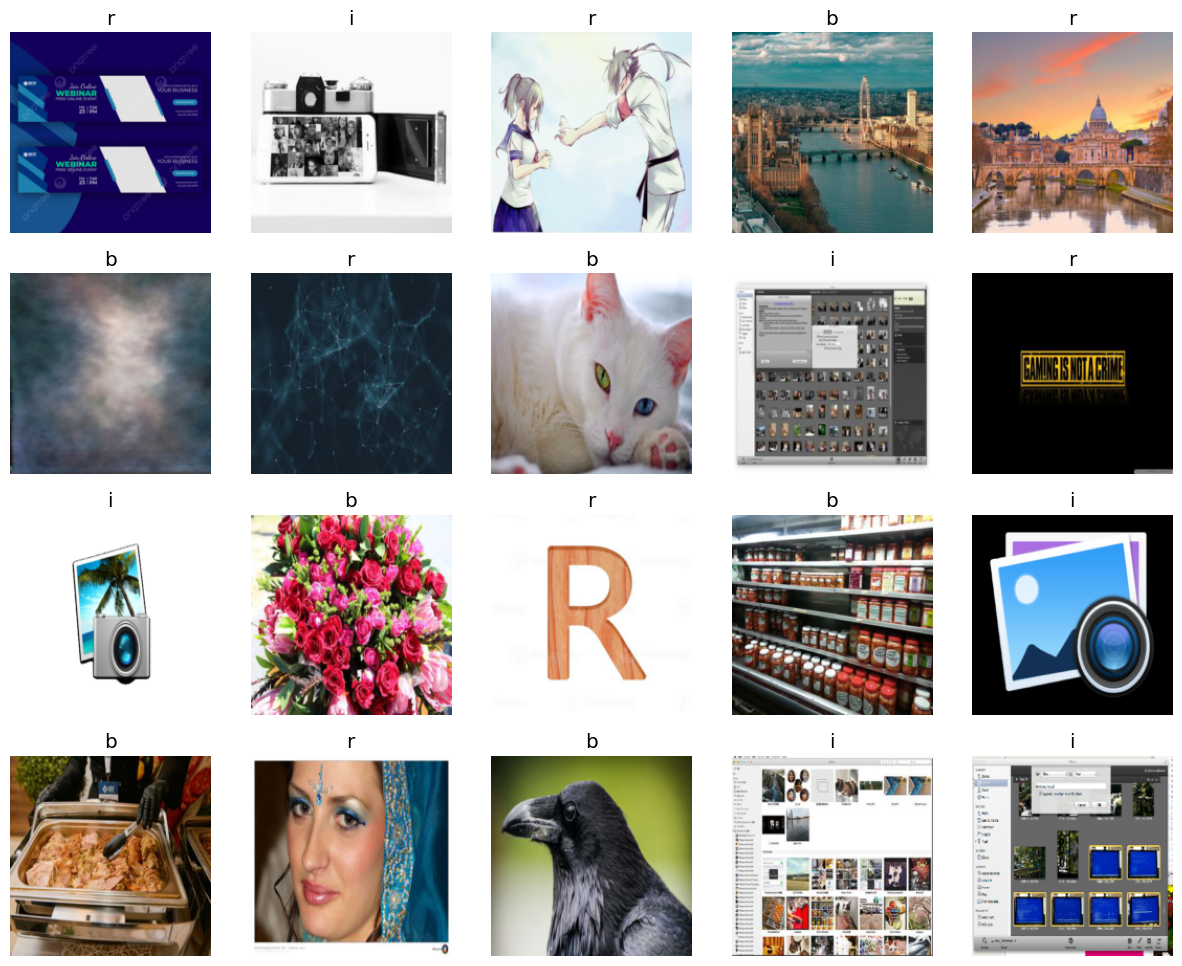

In [23]:
dls=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192,method ='squish')]
).dataloaders(path)
dls.show_batch(max_n=20)